# Import and Prepare Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read Census data CSV file into dataframe for Education Scores
census_df = pd.read_csv('Census Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32}).iloc[:,1:]

# read IRS AGI data CSV file into dataframe for Income Scores
IRS_df = pd.read_csv('IRS AGI Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32}).iloc[:,1:]

# Create combined DataFrame focusing on data from 2011-2017
census_subset_df = census_df[['ZIPCODE','ZipScore',"STATE",'YEAR']][census_df.YEAR < 2018].drop_duplicates().rename(columns={'ZipScore':'EduScore'})
irs_subset_df = IRS_df[['ZIPCODE','ZipScore',"STATE",'YEAR']][IRS_df.YEAR > 2010].drop_duplicates().rename(columns={'ZipScore':'IncomeScore'})
df = census_subset_df.merge(irs_subset_df,on=['ZIPCODE','YEAR',"STATE"])

# Create scatter plots for all zipcodes for each year
g = sns.FacetGrid(df, col="YEAR", col_wrap=2, height=10, hue="YEAR", palette = 'bright')
g = g.map(plt.scatter, "EduScore", "IncomeScore", marker=".")

classes
Lower           2919
Lower-Middle    5583
Middle          4106
Upper           1138
Upper-Middle    2591
Name: clusterer5, dtype: int64

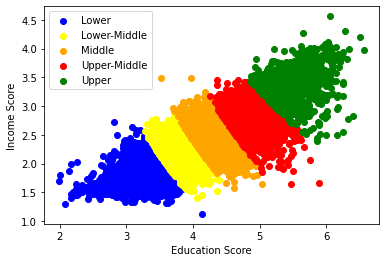

In [212]:
from sklearn.cluster import KMeans

df_yr = df[df.YEAR==2011].copy()
points = [[e,i] for e,i in zip(df_yr.EduScore, df_yr.IncomeScore)]
colors = ['blue','yellow','orange','red','green']


clusterer5 = KMeans(n_clusters=5, random_state=10) 
df_yr['clusterer5'] = clusterer5.fit_predict(points)
df_yr['classes'] = df_yr['clusterer5']
df_yr = df_yr.replace({'classes':{0:'Lower',4:'Lower-Middle',2:'Middle',1:'Upper-Middle',3:'Upper'}})
classes = ['Lower','Lower-Middle','Middle','Upper-Middle','Upper']

for i,c in enumerate(classes):
    plt.scatter(df_yr[df_yr['classes']==c].EduScore, df_yr[df_yr['classes']==c].IncomeScore,c=colors[i],label=c)
    
plt.xlabel('Education Score')
plt.ylabel('Income Score')
plt.legend(loc='upper left')
df_yr.groupby('classes').count().clusterer5

array([2874, 5256, 4192, 1240, 2789], dtype=int64)

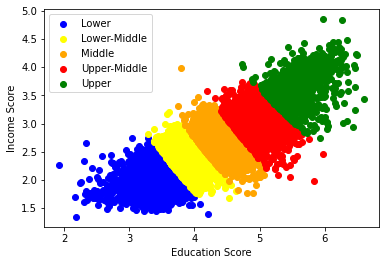

In [214]:
from sklearn.cluster import KMeans

df_yr = df[df.YEAR==2017].copy()
points = [[e,i] for e,i in zip(df_yr.EduScore, df_yr.IncomeScore)]
colors = ['blue','yellow','orange','red','green']


clusterer5 = KMeans(n_clusters=5, random_state=10) 
df_yr['clusterer5'] = clusterer5.fit_predict(points)
df_yr['classes'] = df_yr['clusterer5']
df_yr = df_yr.replace({'classes':{3:'Lower',0:'Lower-Middle',4:'Middle',1:'Upper-Middle',2:'Upper'}})
classes = ['Lower','Lower-Middle','Middle','Upper-Middle','Upper']

for i,c in enumerate(classes):
    plt.scatter(df_yr[df_yr['classes']==c].EduScore, df_yr[df_yr['classes']==c].IncomeScore,c=colors[i],label=c)
    
plt.xlabel('Education Score')
plt.ylabel('Income Score')
plt.legend(loc='upper left')

np.array(df_yr.groupby('classes').count().clusterer5)

For n_clusters = 2 The average silhouette_score is : 0.5252856652024483
For n_clusters = 3 The average silhouette_score is : 0.4285381461106456
For n_clusters = 4 The average silhouette_score is : 0.3908928494106969
For n_clusters = 5 The average silhouette_score is : 0.36040114861892203
For n_clusters = 6 The average silhouette_score is : 0.32400358123569484
For n_clusters = 7 The average silhouette_score is : 0.32995183018164187
For n_clusters = 8 The average silhouette_score is : 0.325949746057551
For n_clusters = 9 The average silhouette_score is : 0.3241716168487993
For n_clusters = 10 The average silhouette_score is : 0.32575591403683557


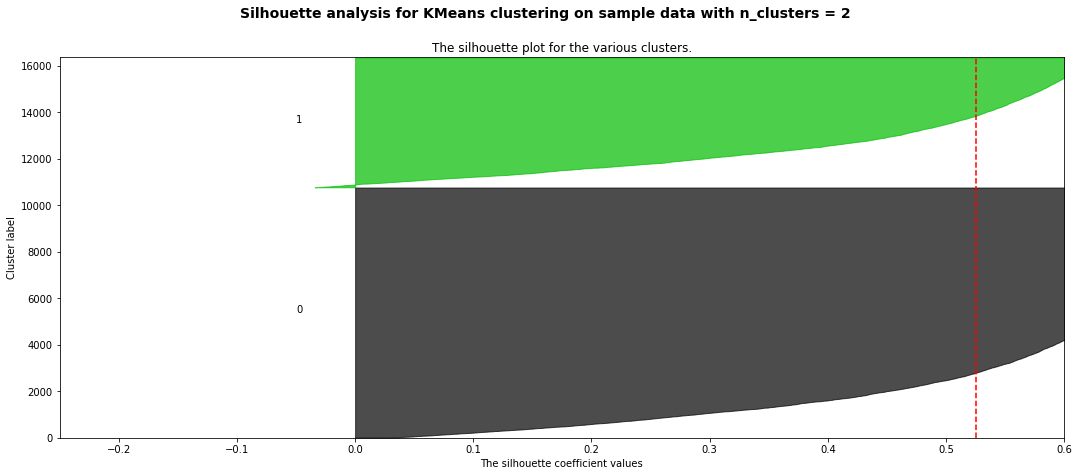

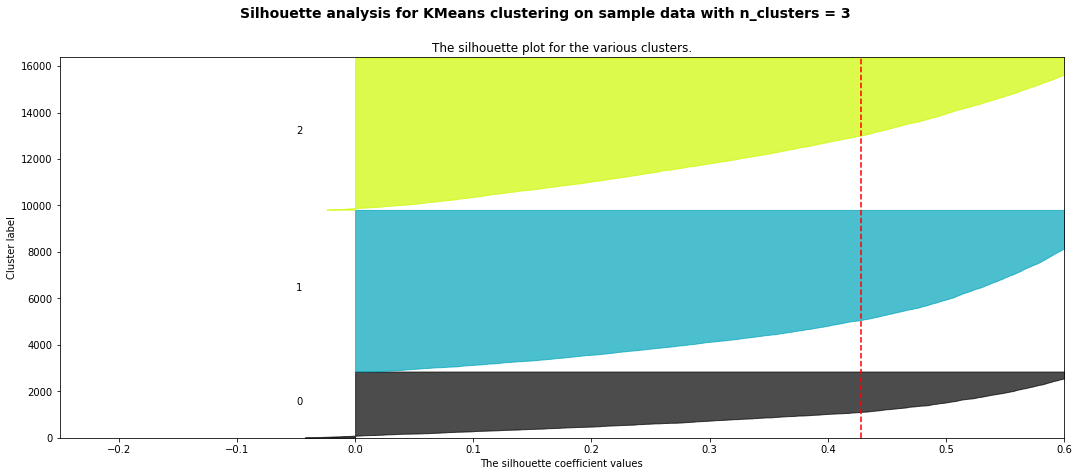

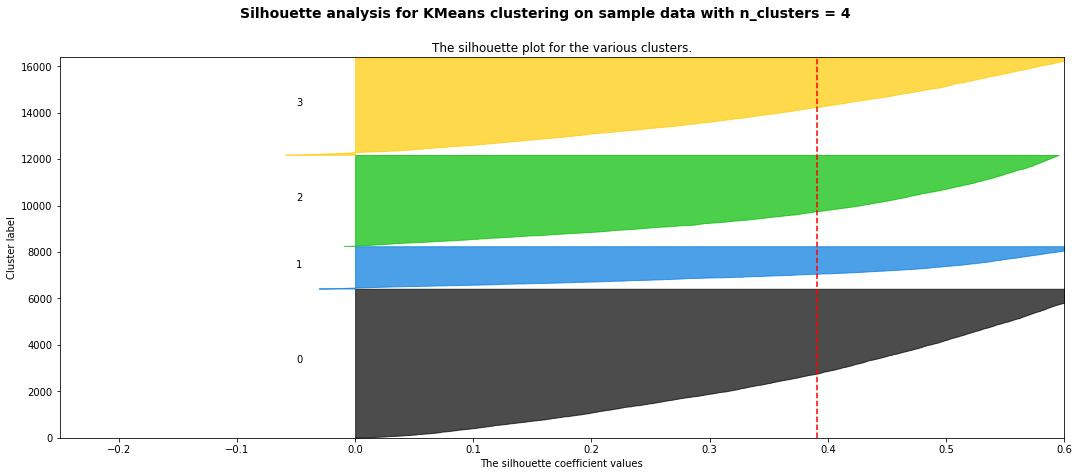

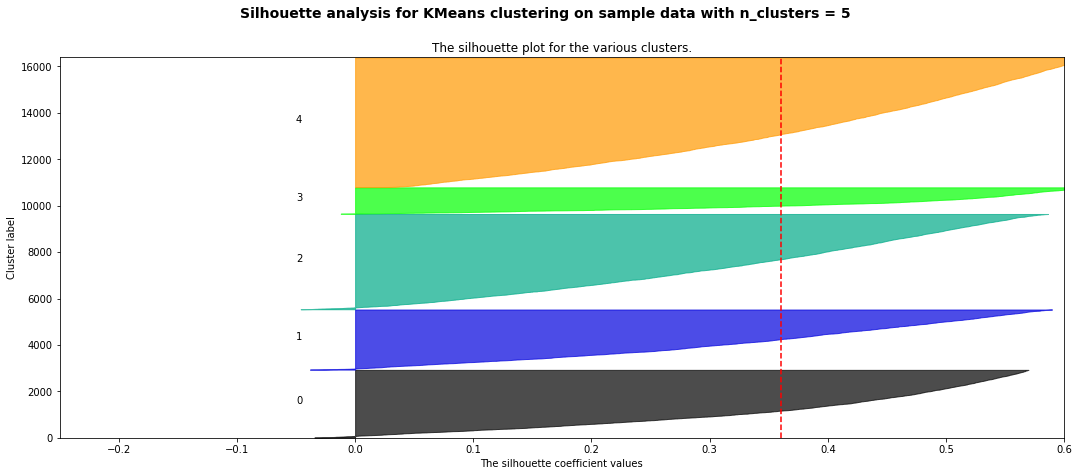

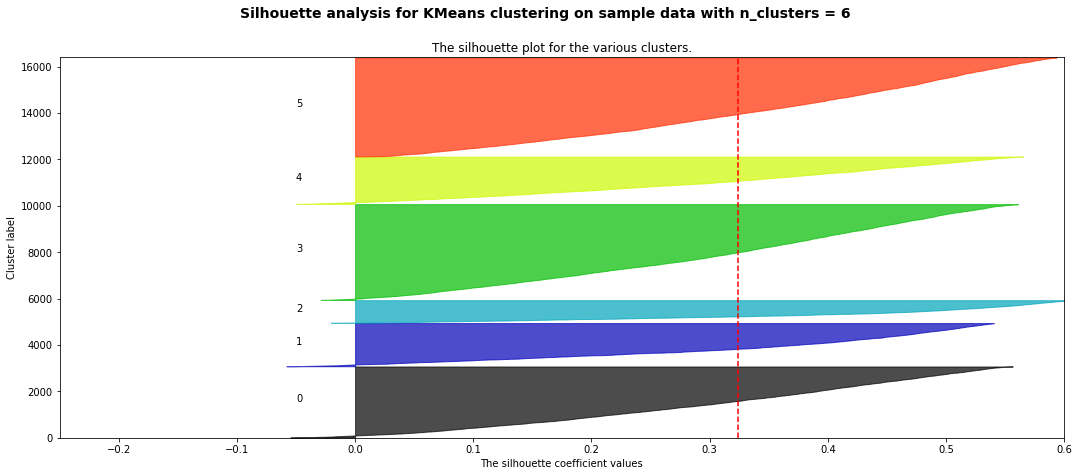

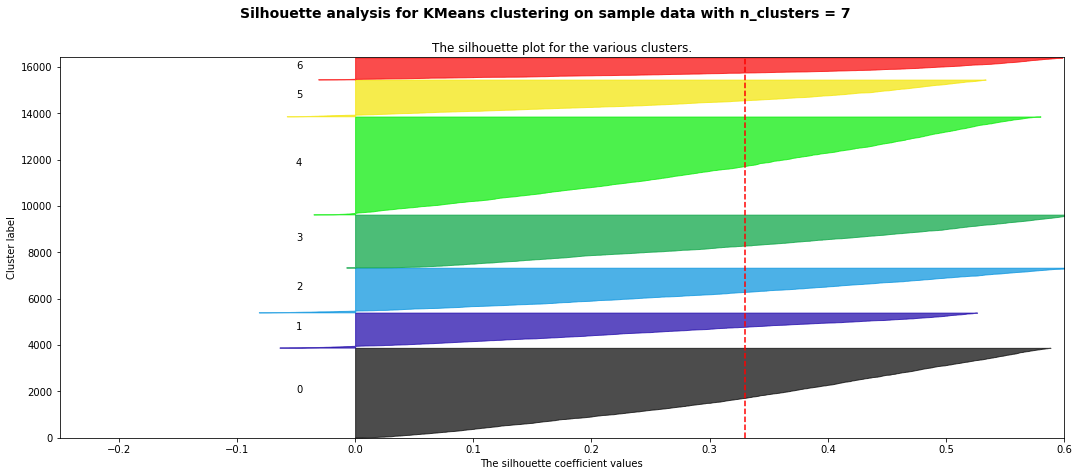

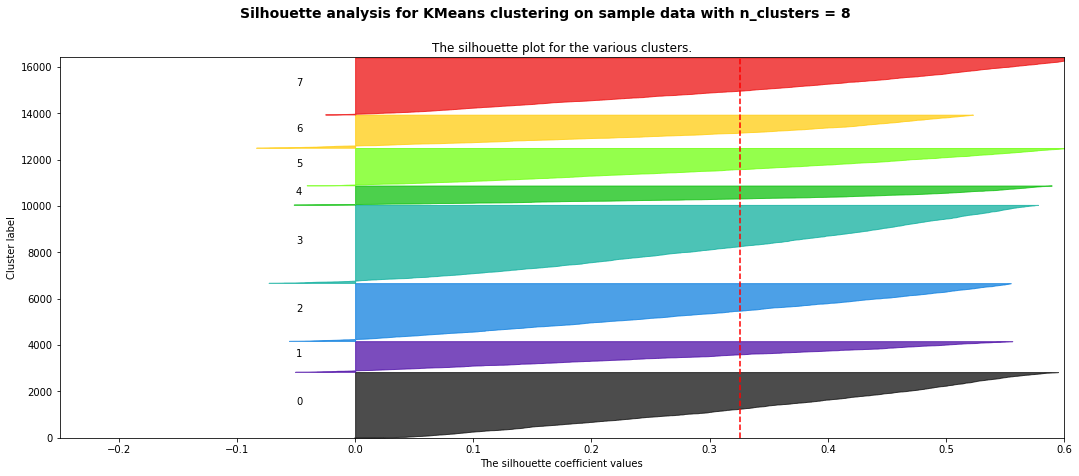

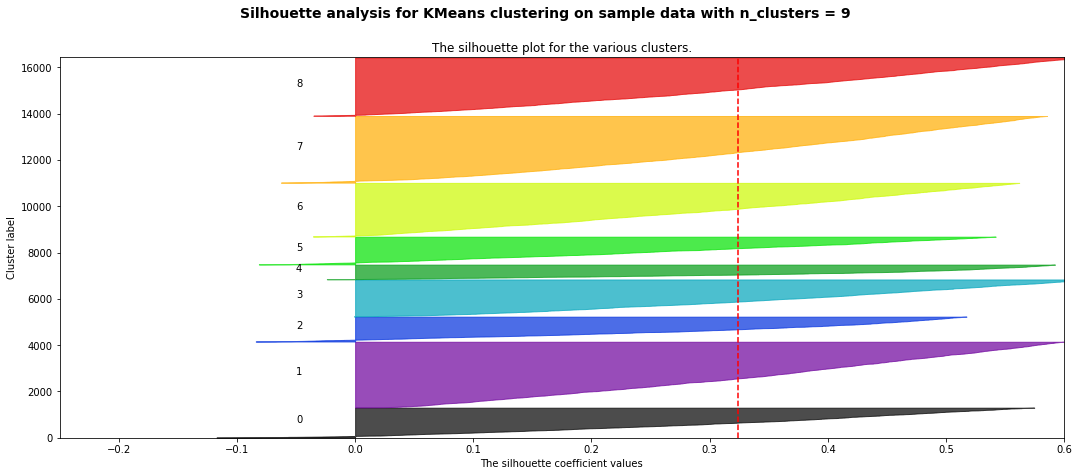

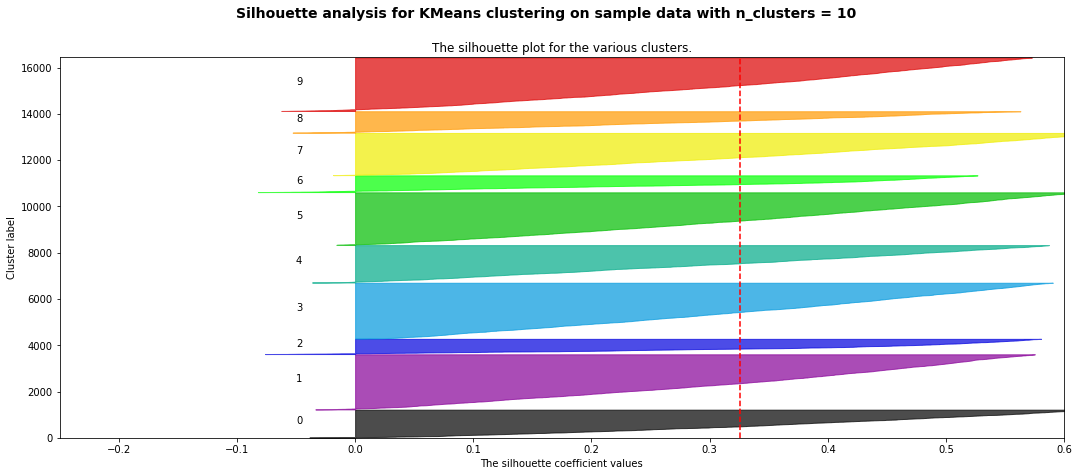

In [3]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

range_n_clusters=range(2,11)

clusters = []
silhouette_avgs = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax.set_xlim([-0.25, 0.6])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(points) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(points)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(points, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    clusters.append(n_clusters)
    silhouette_avgs.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(points, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()